In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [ ]:
data = pd.read_csv('apple_data.csv')

In [3]:
data_prophet = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
data_prophet.head()

,ds,y
0,2015-01-02,24.288580
1,2015-01-05,23.604326
2,2015-01-06,23.606552
3,2015-01-07,23.937576
4,2015-01-08,24.857306


In [4]:
model = Prophet(daily_seasonality=True)  # You can also add weekly/monthly seasonality
model.fit(data_prophet)

00:47:13 - cmdstanpy - INFO - Chain [1] start processing
00:47:14 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=30)  # Forecast 30 future days
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,25.256982,19.686616,40.103732,25.256982,25.256982,4.881523,4.881523,4.881523,4.199421,...,0.156733,0.156733,0.156733,0.525369,0.525369,0.525369,0.0,0.0,0.0,30.138505
1,2015-01-05,25.213735,19.219133,39.367708,25.213735,25.213735,4.207857,4.207857,4.207857,4.199421,...,0.311887,0.311887,0.311887,-0.303452,-0.303452,-0.303452,0.0,0.0,0.0,29.421591
2,2015-01-06,25.199319,20.064378,39.425936,25.199319,25.199319,3.879708,3.879708,3.879708,4.199421,...,0.230695,0.230695,0.230695,-0.550408,-0.550408,-0.550408,0.0,0.0,0.0,29.079027
3,2015-01-07,25.184903,18.434827,38.901267,25.184903,25.184903,3.614753,3.614753,3.614753,4.199421,...,0.193364,0.193364,0.193364,-0.778032,-0.778032,-0.778032,0.0,0.0,0.0,28.799656
4,2015-01-08,25.170487,18.900321,38.679290,25.170487,25.170487,3.372686,3.372686,3.372686,4.199421,...,0.157176,0.157176,0.157176,-0.983912,-0.983912,-0.983912,0.0,0.0,0.0,28.543172


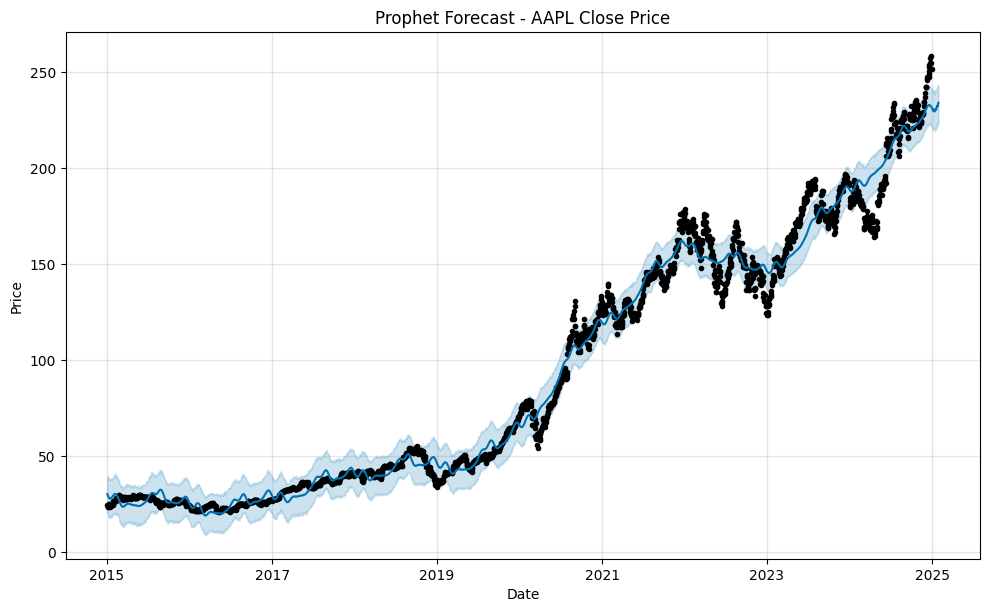

In [6]:
model.plot(forecast)
plt.title("Prophet Forecast - AAPL Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

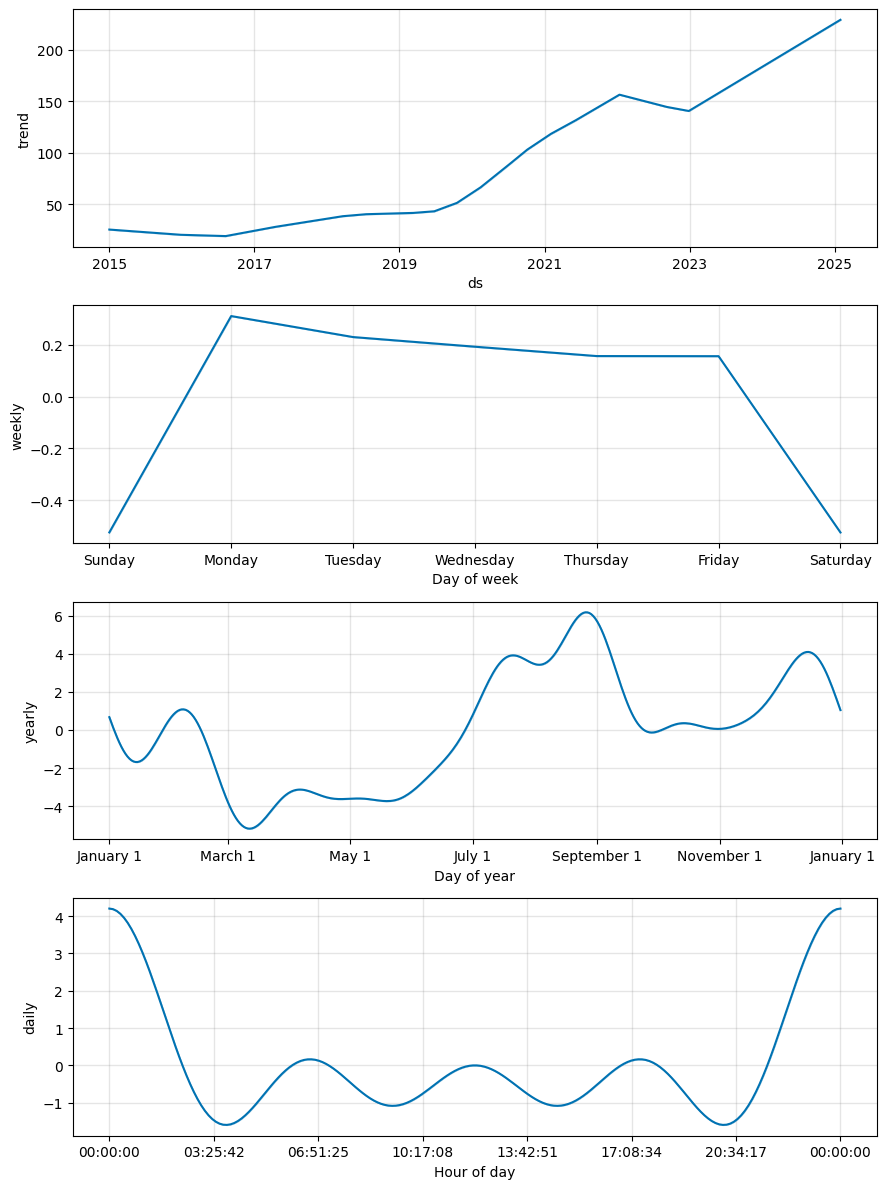

In [ ]:
model.plot_components(forecast)
plt.show()

In [11]:
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

In [12]:
merged = pd.merge(data_prophet, forecast[['ds', 'yhat']], on='ds', how='inner')
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(merged['y'], merged['yhat'])
print(f"📉 Prophet MSE: {mse:}")

📉 Prophet MSE: 58.52842198750127


Y vs Yhat

C:\Users\AYUSH JHA\AppData\Local\Temp\ipykernel_3608\2361963786.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\AYUSH JHA\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


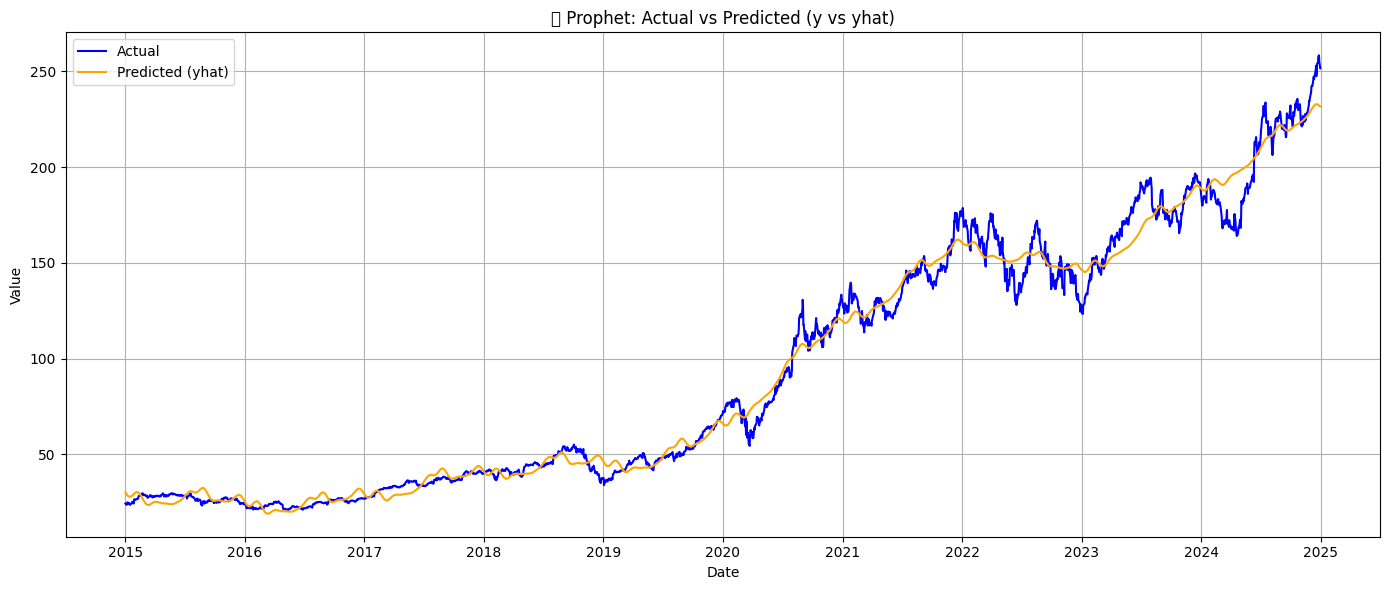

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(merged['ds'], merged['y'], label='Actual', color='blue')
plt.plot(merged['ds'], merged['yhat'], label='Predicted (yhat)', color='orange')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('📈 Prophet: Actual vs Predicted (y vs yhat)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()